# <center>💻 MACHINE LEARNING 💻</center>
# <center>📈 Predictive Insights: Enhancing Black Friday Revenue with Machine Learning Regression Models 📊</center>
## <center>Submitted by: Dasharath Gholap</center>

### Problem Statement
In the fiercely competitive retail industry, Black Friday represents a significant annual opportunity to boost sales, attract new customers, and enhance brand visibility. However, the success of promotional strategies during this period is often hindered by the lack of predictive insights into customer purchasing behaviors, product preferences, and spending patterns. Retailers and e-commerce platforms frequently encounter challenges in inventory management, pricing strategies, and targeted marketing due to the absence of data-driven decision-making tools.<br> This project aims to leverage advanced machine learning regression models to predict customer purchase amounts during the Black Friday sale, based on a comprehensive dataset that captures various customer demographics, product categories, and historical purchasing data. By accurately forecasting sales for different products, our objective is to enable retailers to optimize their stock levels, tailor marketing campaigns, and devise competitive pricing strategies, ultimately maximizing revenue and improving customer satisfaction.

### Libraries Overview

1. **Pandas (pd)**: Pandas is a powerful data manipulation and analysis library in Python, offering data structures and functions for efficiently handling structured data such as tabular and time-series data.

2. **NumPy (np)**: NumPy is a fundamental package for scientific computing in Python, providing support for multidimensional arrays and matrices, along with a wide range of mathematical functions to operate on these arrays.

3. **Seaborn (sns)**: Seaborn is a Python data visualization library based on Matplotlib, offering a high-level interface for creating attractive and informative statistical graphics.

4. **Matplotlib.pyplot (plt)**: Part of the Matplotlib library, Matplotlib.pyplot provides a procedural interface to the Matplotlib object-oriented plotting library, allowing users to create static, animated, and interactive visualizations in Python.

5. **Scikit-learn (sklearn)**: Scikit-learn is a comprehensive machine learning library in Python, offering a wide range of supervised and unsupervised learning algorithms, along with tools for model evaluation, preprocessing, and feature selection.

6. **Statsmodels.stats.outliers_influence variance_inflation_factor**: This module from the Statsmodels library provides functions for detecting multicollinearity in regression analysis, with variance inflation factor (VIF) being a key metric used to quantify multicollinearity.

### Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from collections import Counter
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.stats.multicomp as multi
import statsmodels.api as sm
import warnings
sns.set(style="whitegrid")
pd.options.display.float_format = '{:.2f}'.format
warnings.filterwarnings('ignore', category=FutureWarning)
%matplotlib inline

### Importing Dataset
**The dataset for exploration, modeling, and interpretability, explainability is called "Churn Modeling Dataset" to be found at the kaggle.com.**

**The dataset is loaded into a pandas DataFrame df from a CSV file named 'churn_modelling.csv'.**

**This data set contains details of a bank's customers and the target variable is a binary variable reflecting the fact whether the customer left the bank (closed his account) or he continues to be a customer.**

In [2]:
df = pd.read_csv("D:/Projects/Black Friday/BlackFriday.csv")

In [3]:
#displaying the contents of the dataset
df

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.00,14.00,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.00,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969
...,...,...,...,...,...,...,...,...,...,...,...,...
537572,1004737,P00193542,M,36-45,16,C,1,0,1,2.00,NaN,11664
537573,1004737,P00111142,M,36-45,16,C,1,0,1,15.00,16.00,19196
537574,1004737,P00345942,M,36-45,16,C,1,0,8,15.00,NaN,8043
537575,1004737,P00285842,M,36-45,16,C,1,0,5,NaN,NaN,7172


**This dataset contains the records of 537577 orders, where each customer profile has 12 features**.

### Exploratory Data Analysis
**Perform Exploratory Data Analysis (EDA) / indicate how features correlate among themselves, with emphasis to the target/label one**

In [4]:
# Checking the shape of the dataset
df.shape

(537577, 12)

In [5]:
# Checking summary of the dataset
print("Data Information:")
print(df.info())

Data Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 537577 entries, 0 to 537576
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     537577 non-null  int64  
 1   Product_ID                  537577 non-null  object 
 2   Gender                      537577 non-null  object 
 3   Age                         537577 non-null  object 
 4   Occupation                  537577 non-null  int64  
 5   City_Category               537577 non-null  object 
 6   Stay_In_Current_City_Years  537577 non-null  object 
 7   Marital_Status              537577 non-null  int64  
 8   Product_Category_1          537577 non-null  int64  
 9   Product_Category_2          370591 non-null  float64
 10  Product_Category_3          164278 non-null  float64
 11  Purchase                    537577 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 49.2+

In [6]:
# Find the number of unique values in each column
df.apply(lambda x: len(x.unique()))

User_ID                        5891
Product_ID                     3623
Gender                            2
Age                               7
Occupation                       21
City_Category                     3
Stay_In_Current_City_Years        5
Marital_Status                    2
Product_Category_1               18
Product_Category_2               18
Product_Category_3               16
Purchase                      17959
dtype: int64

In [7]:
# Descriptive statistics for numeric columns
print("\nSummary Statistics:")
df.describe().T


Summary Statistics:


,count,mean,std,min,25%,50%,75%,max
User_ID,537577.00,1002991.85,1714.39,1000001.00,1001495.00,1003031.00,1004417.00,1006040.00
Occupation,537577.00,8.08,6.52,0.00,2.00,7.00,14.00,20.00
Marital_Status,537577.00,0.41,0.49,0.00,0.00,0.00,1.00,1.00
Product_Category_1,537577.00,5.30,3.75,1.00,1.00,5.00,8.00,18.00
Product_Category_2,370591.00,9.84,5.09,2.00,5.00,9.00,15.00,18.00
Product_Category_3,164278.00,12.67,4.12,3.00,9.00,14.00,16.00,18.00
Purchase,537577.00,9333.86,4981.02,185.00,5866.00,8062.00,12073.00,23961.00


In [8]:
# Descriptive statistics for categorical columns
print(df.describe(include=['object']))

       Product_ID  Gender     Age City_Category Stay_In_Current_City_Years
count      537577  537577  537577        537577                     537577
unique       3623       2       7             3                          5
top     P00265242       M   26-35             B                          1
freq         1858  405380  214690        226493                     189192


In [9]:
# Identifying duplicates in the dataset
duplicate = df.duplicated() 
print(duplicate.sum()) 
df[duplicate]

0


,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase


In [10]:
# Checking for missing values in the dataset
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            166986
Product_Category_3            373299
Purchase                           0
dtype: int64

In [11]:
# Checking unique values in categorical features
print("\nUnique Values in Categorical Features:")
for col in df.select_dtypes(include=['object']).columns:
    print(col, ":", df[col].unique())


Unique Values in Categorical Features:
Product_ID : ['P00069042' 'P00248942' 'P00087842' ... 'P00038842' 'P00295642'
 'P00091742']
Gender : ['F' 'M']
Age : ['0-17' '55+' '26-35' '46-50' '51-55' '36-45' '18-25']
City_Category : ['A' 'C' 'B']
Stay_In_Current_City_Years : ['2' '4+' '3' '1' '0']


In [12]:
# Checking for target value distribution in the dataset
print("\nTarget Distribution:")
print(df['Purchase'].value_counts())


Target Distribution:
Purchase
6855     186
7011     185
6891     182
7193     182
6879     181
        ... 
7292       1
9309       1
23128      1
21408      1
18426      1
Name: count, Length: 17959, dtype: int64


### Data Preprocessing
**The steps collectively form an essential part of data preprocessing, which aims to clean, transform, and prepare the data for model training and evaluation**.

In [13]:
# Handling missing values for Product_Category_2 and Product_Category_3
# Assuming 0 as 'No Category' for simplicity.
df['Product_Category_2'].fillna(0, inplace=True)
df['Product_Category_3'].fillna(0, inplace=True)

In [14]:
# Separate features (X) and target variable (y)
X = df.drop('Purchase', axis=1)
y = df['Purchase']

In [15]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
# Define numeric features and categorical features
numeric_features = ['Occupation','Marital_Status', 'Product_Category_1', 'Product_Category_2', 'Product_Category_3']
categorical_features = [ 'Gender', 'Age', 'City_Category', 'Stay_In_Current_City_Years']

# Define preprocessing steps for numeric features
numeric_transformer = Pipeline(steps=[('scaler', StandardScaler())])

# Define preprocessing steps for categorical features: one-hot encoding
categorical_transformer = Pipeline(steps=[('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine numeric and categorical preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Apply preprocessing to the training set
X_train_transformed = preprocessor.fit_transform(X_train)

# Apply preprocessing to the test set
X_test_transformed = preprocessor.transform(X_test)

### Data Visualization

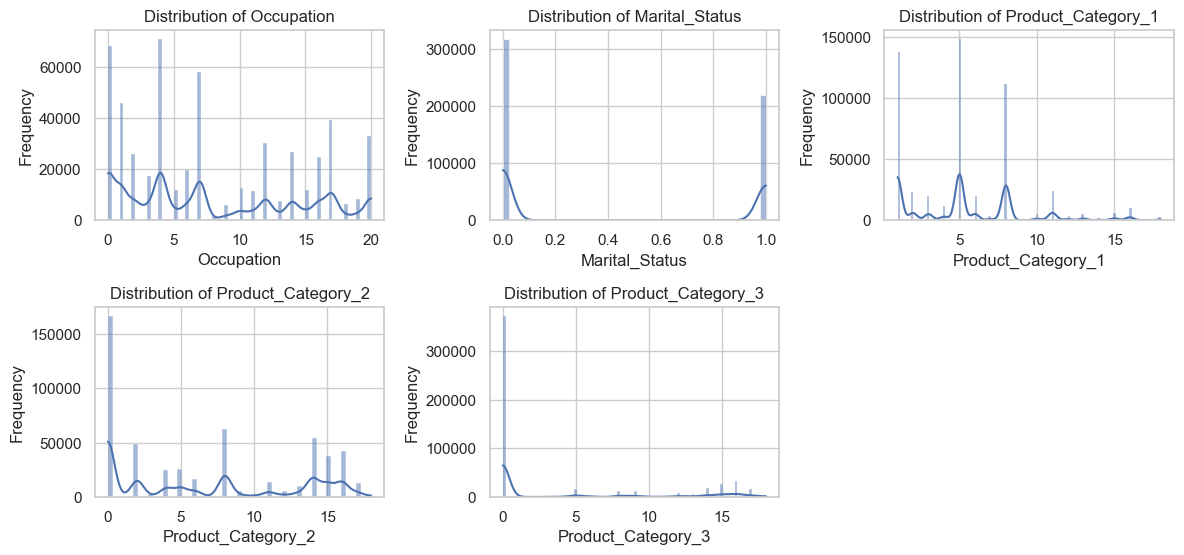

In [17]:
# Visualize the distributions of numeric features
plt.figure(figsize=(12,8))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.histplot(df[feature], kde=True)
    plt.title(f'Distribution of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

The KDE overlays provide a smoothed version of the distribution, showing the shape more clearly.
- The distribution appears to be somewhat uniform across different occupation codes, with certain occupations having slightly higher frequencies.
- There's a larger peak at '0', suggesting that there are more single individuals than married ones in the dataset.
- A multimodal distribution with several peaks, indicating certain product categories in 'Product_Category_1' are more common than others.
- The distribution is heavily skewed to the left with a long tail to the right, this is due to large number of missing values and imputation with 0.

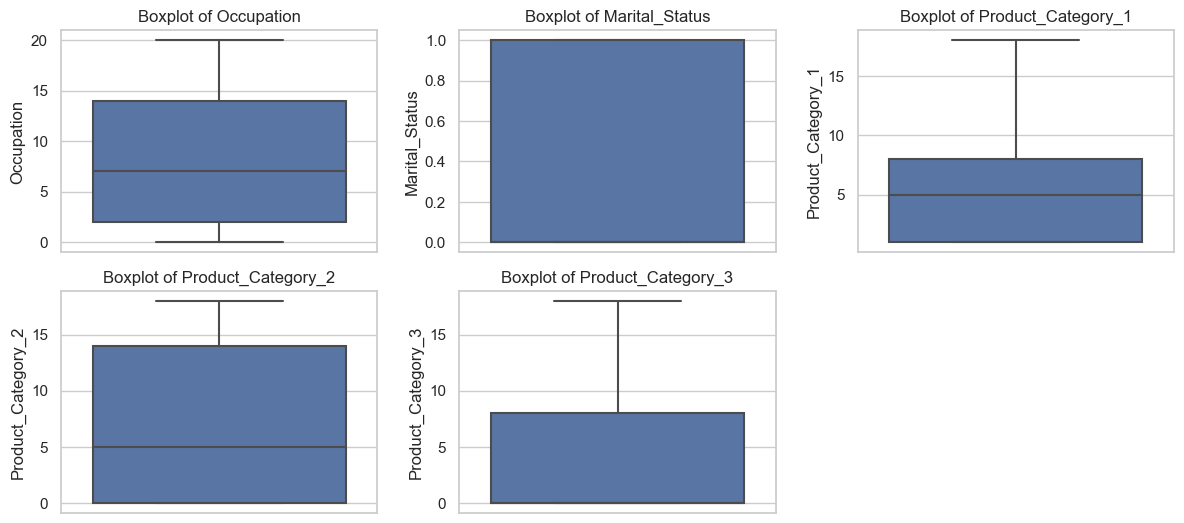

In [18]:
# Plot box plots for each numeric feature
plt.figure(figsize=(12,8))
for i, feature in enumerate(numeric_features):
    plt.subplot(3, 3, i+1)
    sns.boxplot(data=df, y=feature)
    plt.title(f'Boxplot of {feature}')
plt.tight_layout()
plt.show()

The box plots provide a summary of the data's distribution, including the median (central line), the interquartile range (IQR, represented by the box), and potential outliers (points outside the whiskers).
- The box plot suggests a fairly uniform distribution of occupation codes amongst the dataset participants, with no extreme outliers.
- There are a few outliers above the upper quartile of Product_Category_1. The median is closer to the first quartile, indicating a slight skewness towards lower category numbers.
- For Product_Category_2 and Product_Category_3, the box plot shows a large number of outliers above the upper quartile.

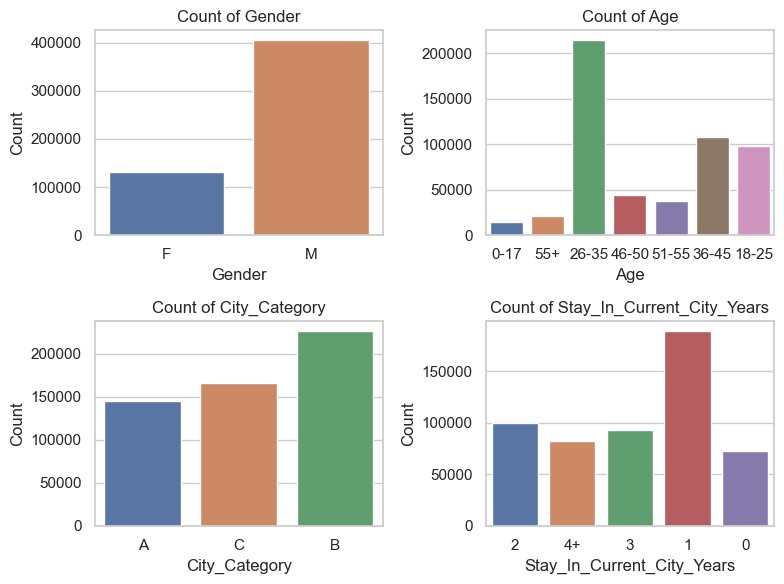

In [19]:
# Explore the distribution of categorical features
plt.figure(figsize=(8,6))
for i, feature in enumerate(categorical_features):
    plt.subplot(2, 2, i+1)
    sns.countplot(data=df, x=feature)
    plt.title(f'Count of {feature}')
    plt.xlabel(feature)
    plt.ylabel('Count')
plt.tight_layout()
plt.show()

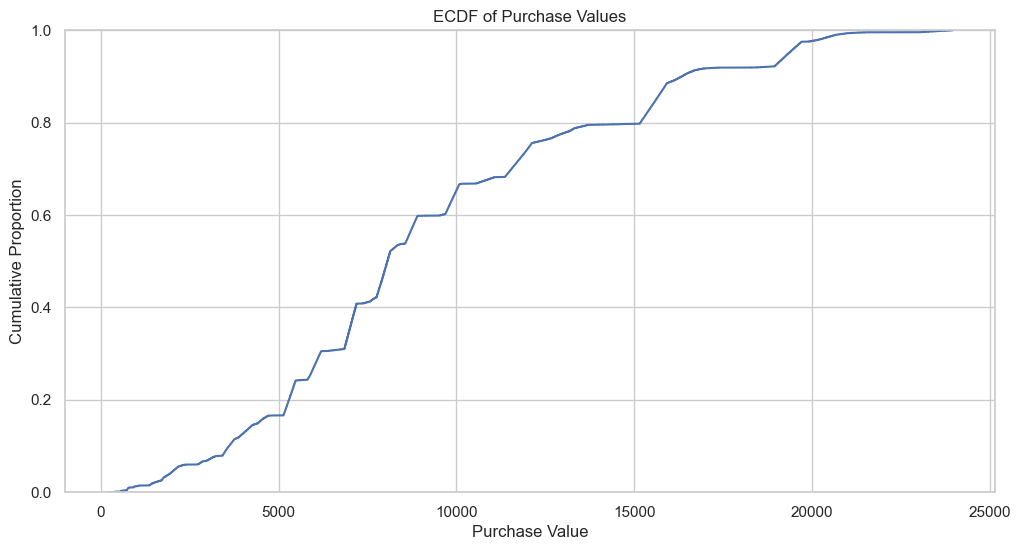

In [20]:
# Plot the distribution of the target variable (Purchase)
plt.figure(figsize=(12,6))
sns.ecdfplot(data=df, x='Purchase')
plt.title('ECDF of Purchase Values')
plt.xlabel('Purchase Value')
plt.ylabel('Cumulative Proportion')
plt.grid(True)
plt.show()

From the plot, we can observe that:

- 50% of the purchases are approximately at or below the 10,000 purchase value mark.
- The curve approaches 1.0 but doesn't reach it within the plotted range, suggesting that the highest purchase values are rare or single instances.
- There is a steep rise starting near the 5000 purchase value, suggesting that a significant number of purchases cluster around this range.
- The more gradual slopes e.g between approximately 10,000 and 15,000, the curve rises more slowly, indicating fewer purchases in that range compared to the steeper sections.

### Segmentation Analysis

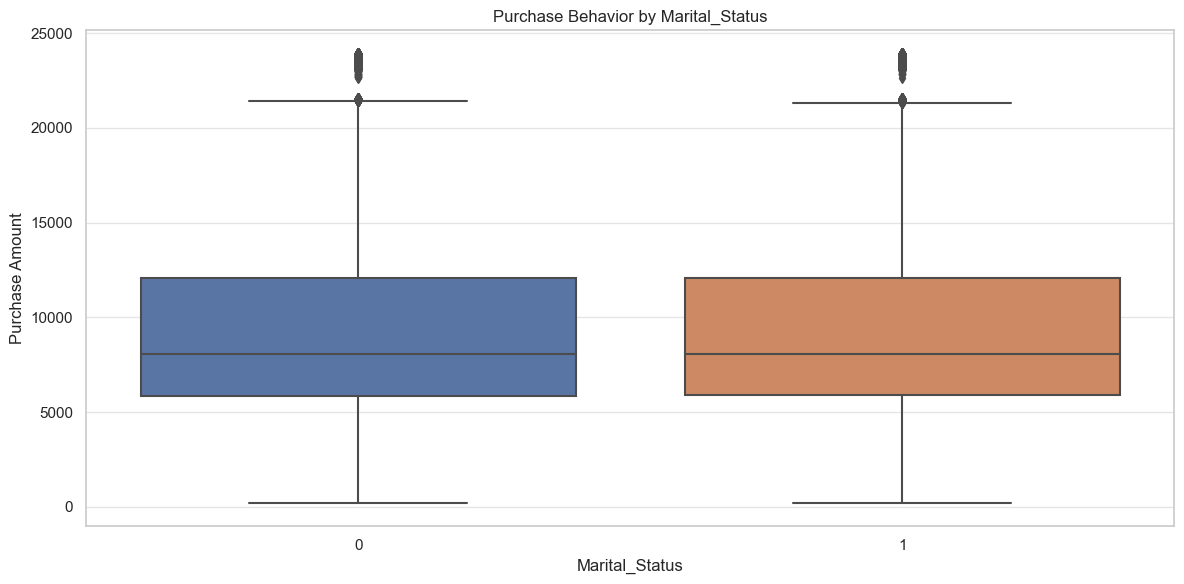

Descriptive statistics for Marital_Status:
                   count    mean     std    min     25%     50%      75%  \
Marital_Status                                                             
0              317817.00 9333.33 4985.25 185.00 5850.00 8059.00 12080.00   
1              219760.00 9334.63 4974.91 186.00 5886.00 8066.00 12065.00   

                    max  
Marital_Status           
0              23961.00  
1              23961.00  


ANOVA results for Marital_Status: F = 0.008948303078011218, p = 0.9246361830127376
--------------------------------------------------



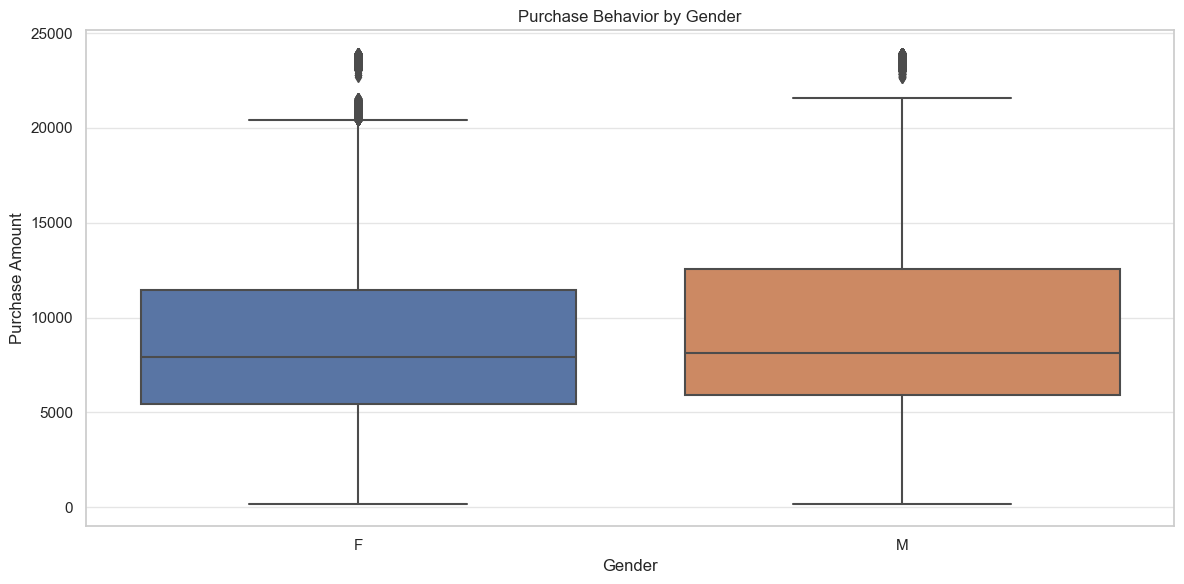

Descriptive statistics for Gender:
           count    mean     std    min     25%     50%      75%      max
Gender                                                                   
F      132197.00 8809.76 4721.44 185.00 5459.00 7929.00 11436.00 23959.00
M      405380.00 9504.77 5051.06 185.00 5901.00 8112.00 12542.00 23961.00


ANOVA results for Gender: F = 1947.8649419367853, p = 0.0
--------------------------------------------------

Tukey's HSD test for Gender:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     F      M 695.0104   0.0 664.1458 725.8749   True
-----------------------------------------------------
['F' 'M']
--------------------------------------------------



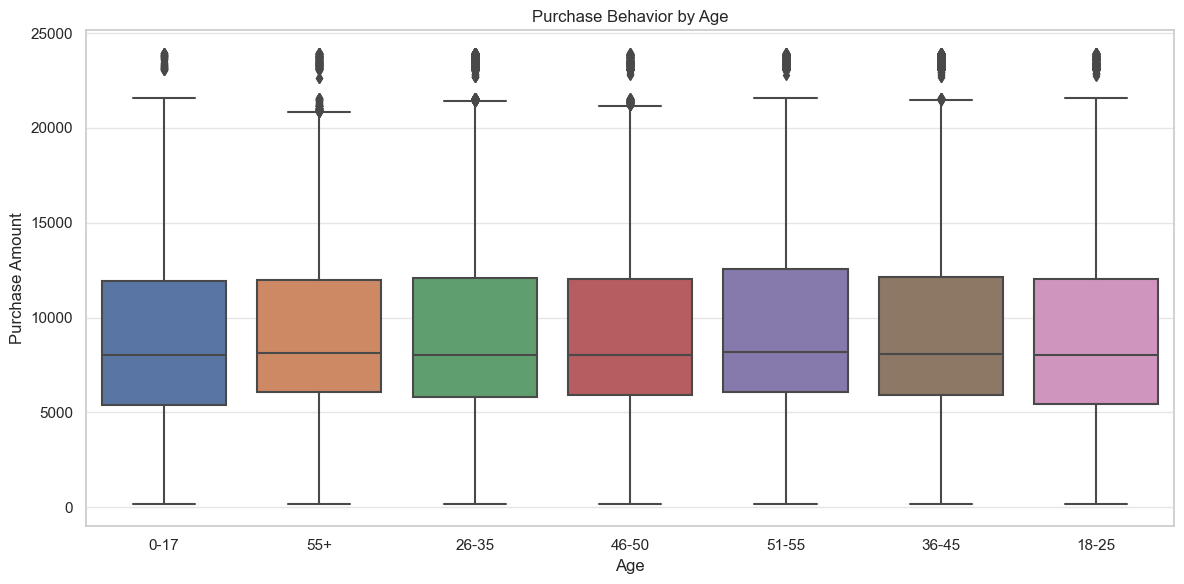

Descriptive statistics for Age:
          count    mean     std    min     25%     50%      75%      max
Age                                                                     
0-17   14707.00 9020.13 5060.50 187.00 5365.00 8009.00 11904.50 23955.00
18-25  97634.00 9235.20 4995.72 185.00 5439.00 8041.00 12044.00 23958.00
26-35 214690.00 9314.59 4974.08 185.00 5833.00 8043.00 12063.00 23961.00
36-45 107499.00 9401.48 4978.25 185.00 5910.00 8076.00 12131.00 23960.00
46-50  44526.00 9284.87 4921.25 186.00 5921.00 8050.00 12021.75 23960.00
51-55  37618.00 9620.62 5035.33 187.00 6056.00 8172.00 12578.50 23960.00
55+    20903.00 9453.90 4939.12 187.00 6068.00 8127.00 11976.00 23960.00


ANOVA results for Age: F = 43.48718107271441, p = 1.9552104879020313e-53
--------------------------------------------------

Tukey's HSD test for Age:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
group1 group2  meandiff p-adj    lower    upper   reject
--------------------------------------------

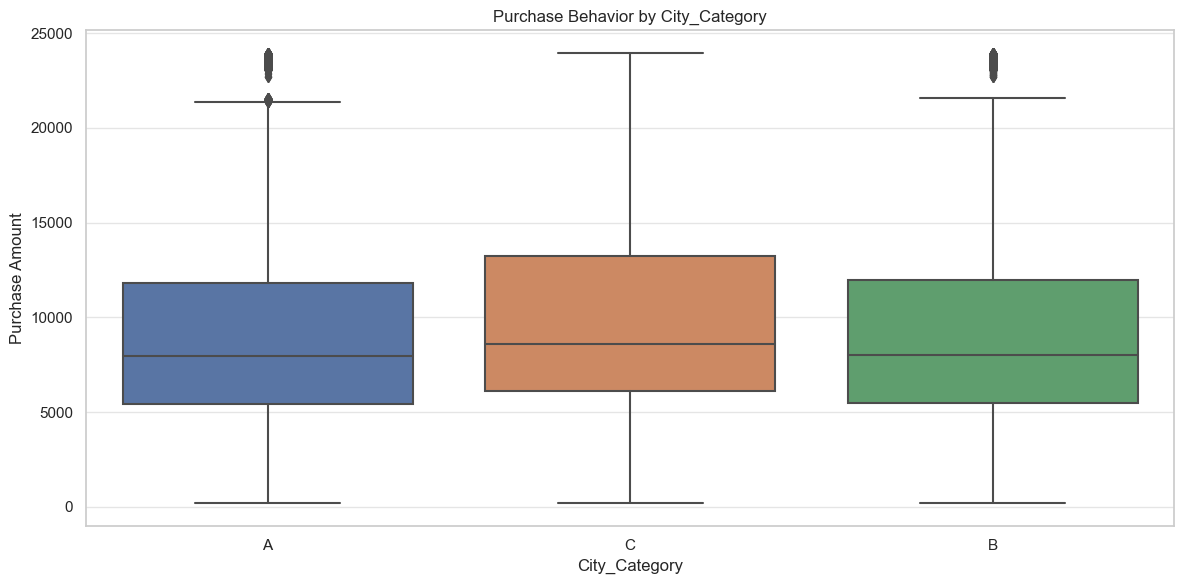

Descriptive statistics for City_Category:
                  count    mean     std    min     25%     50%      75%  \
City_Category                                                             
A             144638.00 8958.01 4866.90 185.00 5419.00 7941.00 11801.75   
B             226493.00 9198.66 4927.06 185.00 5477.00 8015.00 12000.00   
C             166446.00 9844.44 5109.47 186.00 6094.00 8618.00 13268.00   

                   max  
City_Category           
A             23961.00  
B             23960.00  
C             23961.00  


ANOVA results for City_Category: F = 1376.6587765751206, p = 0.0
--------------------------------------------------

Tukey's HSD test for City_Category:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper   reject
-----------------------------------------------------
     A      B 240.6468   0.0  201.454 279.8397   True
     A      C 886.4308   0.0 844.5734 928.2883   True
     B      C  645.784   0.0 608

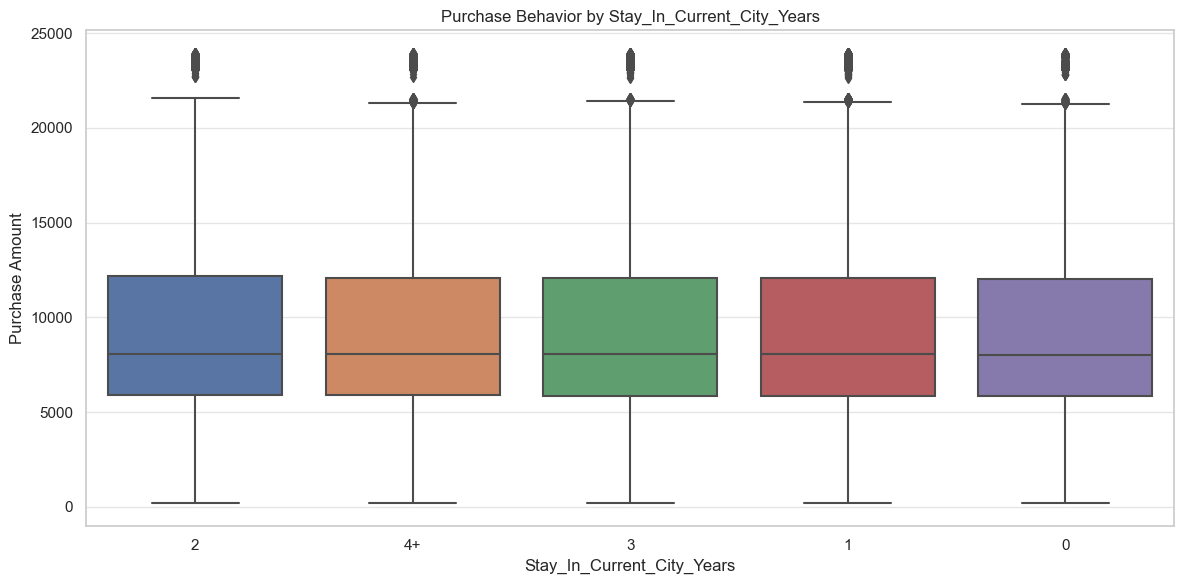

Descriptive statistics for Stay_In_Current_City_Years:
                               count    mean     std    min     25%     50%  \
Stay_In_Current_City_Years                                                    
0                           72725.00 9247.24 4951.92 185.00 5842.00 8038.00   
1                          189192.00 9319.87 4984.01 185.00 5848.00 8055.00   
2                           99459.00 9397.61 4998.89 185.00 5892.00 8089.00   
3                           93312.00 9350.69 4979.88 187.00 5872.00 8060.50   
4+                          82889.00 9346.37 4978.35 190.00 5887.00 8067.00   

                                75%      max  
Stay_In_Current_City_Years                    
0                          12011.00 23960.00  
1                          12060.00 23961.00  
2                          12188.00 23961.00  
3                          12092.00 23961.00  
4+                         12058.00 23958.00  


ANOVA results for Stay_In_Current_City_Years: F = 10.3419782

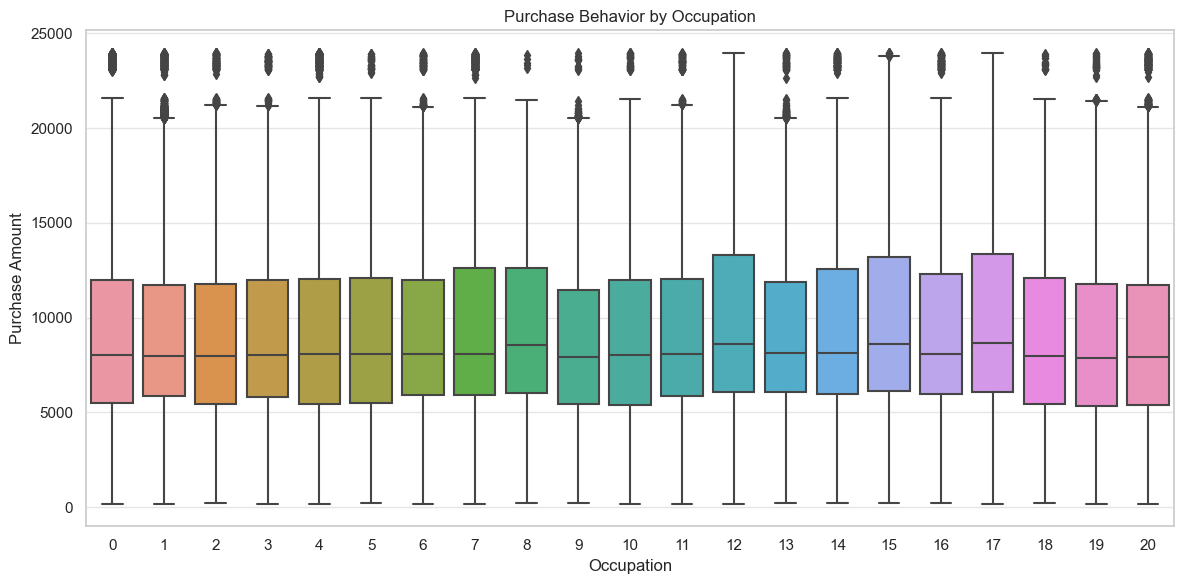

Descriptive statistics for Occupation:
              count    mean     std    min     25%     50%      75%      max
Occupation                                                                  
0          68120.00 9186.95 4935.27 188.00 5470.00 8016.00 11979.00 23961.00
1          45971.00 9017.70 4791.33 185.00 5859.00 7977.00 11725.00 23960.00
2          25845.00 9025.94 4910.66 197.00 5441.00 7964.00 11753.00 23955.00
3          17366.00 9238.08 4963.31 188.00 5834.00 8021.00 11977.75 23914.00
4          70862.00 9279.03 5003.70 185.00 5463.00 8058.00 12052.00 23961.00
5          11985.00 9388.85 4987.67 209.00 5476.00 8092.00 12111.00 23924.00
6          19822.00 9336.38 4947.85 188.00 5923.25 8067.50 12002.75 23951.00
7          57806.00 9502.18 5044.23 187.00 5914.00 8085.00 12608.75 23948.00
8           1524.00 9576.51 4884.63 193.00 5995.75 8540.50 12642.00 23869.00
9           6153.00 8714.34 4600.19 209.00 5427.00 7902.00 11462.00 23943.00
10         12623.00 9052.84 5073.54 1

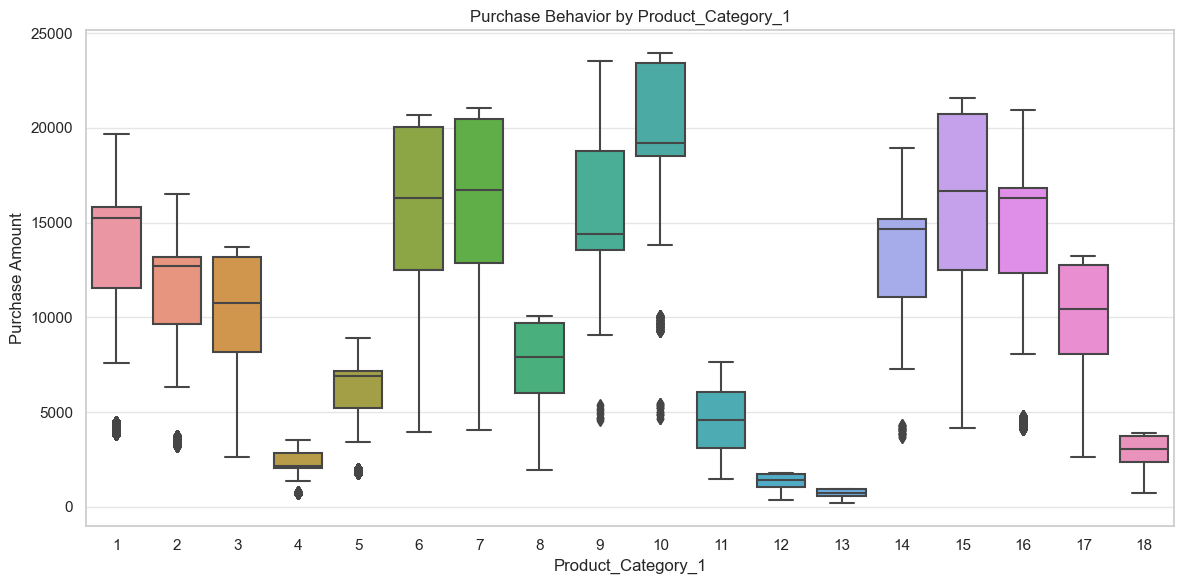

Descriptive statistics for Product_Category_1:
                       count     mean     std     min      25%      50%  \
Product_Category_1                                                        
1                  138353.00 13607.70 4297.60 3790.00 11546.00 15245.00   
2                   23499.00 11255.68 3569.36 3176.00  9647.00 12730.00   
3                   19849.00 10096.84 2826.22 2638.00  8198.00 10742.00   
4                   11567.00  2328.86  813.37  684.00  2058.00  2175.00   
5                  148592.00  6238.00 1909.42 1713.00  5241.00  6911.00   
6                   20164.00 15837.89 4010.94 3981.00 12503.00 16312.00   
7                    3668.00 16373.83 4168.61 4061.00 12848.75 16701.00   
8                  112132.00  7497.35 2013.55 1939.00  6036.00  7905.00   
9                     404.00 15538.30 5305.48 4528.00 13586.50 14388.50   
10                   5032.00 19679.97 4233.28 4624.00 18545.00 19205.50   
11                  23960.00  4682.93 1834.70 1472.00

In [21]:
# Variables to analyze
variables_to_analyze = [
    'Marital_Status', 'Gender', 'Age', 'City_Category', 
    'Stay_In_Current_City_Years', 'Occupation', 'Product_Category_1'
]

# Analyze purchase behavior within each group and provide statistical summaries
for variable in variables_to_analyze:
    plt.figure(figsize=(12, 6))
    
    # Generate a boxplot
    sns.boxplot(x=variable, y='Purchase', data=df)
    plt.title(f'Purchase Behavior by {variable}')
    plt.xlabel(variable)
    plt.ylabel('Purchase Amount')
    plt.grid(axis='y', alpha=0.5)
    
    # Show the plot
    plt.tight_layout()
    plt.show()
    
    # Calculate and display descriptive statistics for each segment
    group_stats = df.groupby(variable)['Purchase'].describe()
    print(f'Descriptive statistics for {variable}:')
    print(group_stats)
    print("\n")

    # Perform an ANOVA test
    # Collect groups for ANOVA
    grouped_data = [group['Purchase'].values for name, group in df.groupby(variable)]
    f_val, p_val = stats.f_oneway(*grouped_data)
    print(f'ANOVA results for {variable}: F = {f_val}, p = {p_val}')
    print("--------------------------------------------------\n")
    
    # If the ANOVA is significant, perform Tukey's HSD Test
    if p_val < 0.05:  # We only perform the post-hoc test if ANOVA is significant
        print(f"Tukey's HSD test for {variable}:")
        mc = sm.stats.multicomp.MultiComparison(df['Purchase'], df[variable])
        result = mc.tukeyhsd()
        
        print(result)
        print(mc.groupsunique)
        print("--------------------------------------------------\n")

The quantitative analysis results for these categories:

1.**Marital_Status:**
The descriptive statistics show almost identical mean purchase amounts for different marital statuses.
The ANOVA result indicates that marital status does not significantly affect the purchase amount (p > 0.05).<br>

2.**Gender:**
Males (M) have a higher mean purchase amount than females (F).
ANOVA and Tukey's HSD tests confirm that the difference in purchase behavior between genders is statistically significant (p = 0.0), with males spending more on average than females by about 695 units.<br>

3.**Age:**
There are noticeable differences in the mean purchase amounts among different age groups.
ANOVA results show that age significantly affects purchase behavior (p < 0.05), and Tukey’s HSD test details the differences between the age groups. For example, the 51-55 age group spends more on average than the 0-17 age group by about 600 units.<br>

4.**City_Category:**
Mean purchase amounts differ by city category, with category C having the highest mean.
ANOVA results and Tukey's HSD test indicate that these differences are statistically significant (p = 0.0), suggesting that city category influences purchase behavior.<br>

5.**Stay_In_Current_City_Years:**
There are slight variations in purchase amounts based on the number of years staying in the current city.
ANOVA results suggest that the duration of stay in the current city has a statistically significant impact on purchase amount (p < 0.05).<br>

6.**Occupation:**
Different occupations show variations in mean purchase amounts.
ANOVA indicates a significant effect of occupation on purchase behavior (p = 0.0), with Tukey’s HSD test showing specific differences between occupation categories.<br>

7.**Product_Category_1:**
Significant differences in purchase amounts are evident across different product categories.
ANOVA and Tukey’s HSD test confirm these differences are statistically significant (p = 0.0). For instance, product category 10 has a much higher mean purchase amount compared to category 1.

These findings suggest that factors like gender, age, city category, years in the current city, occupation, and product category have a significant impact on purchase behavior, while marital status does not. Retailers and marketers could use these insights to tailor their strategies and offerings to various customer segments.

### Correlation Matrix

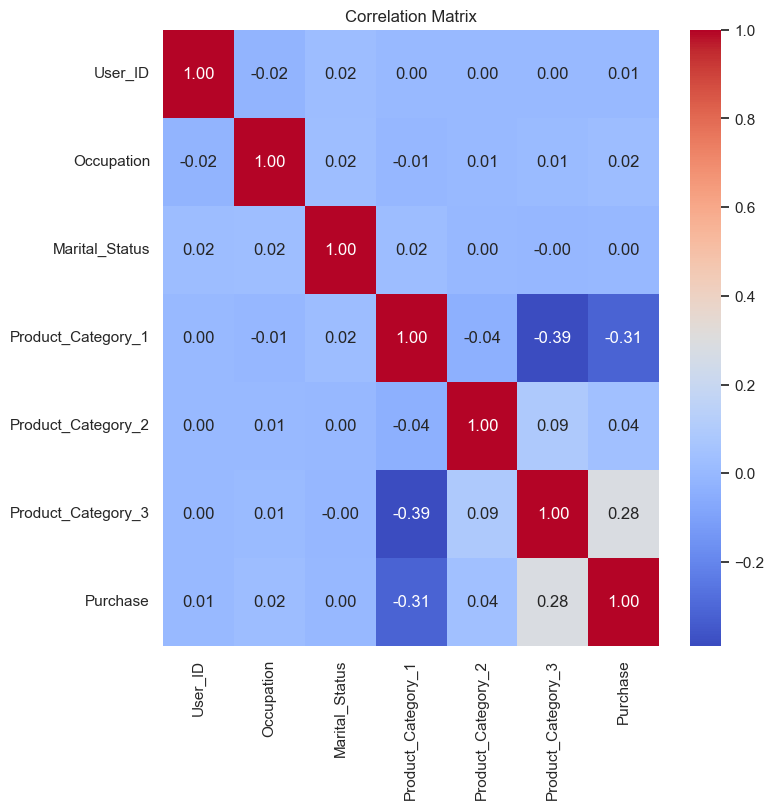

In [22]:
# Compute and visualize the correlation matrix for numeric features
numeric_df = df.select_dtypes(include = ['int64', 'float64'])
correlation_matrix = numeric_df.corr()

plt.figure(figsize = (8,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

Overall, the heatmap suggests that there are no strong correlations between the numerical features in this dataset, especially with respect to Purchase. The most notable correlation is a moderate negative one between Product_Category_1 and Purchase, which could be worth investigating further. The weak correlations imply that linear models may not perform well in predicting Purchase and that the dataset may require more complex models or feature engineering to capture the relationships effectively.

### Feature Engineering
**Variance Inflation Factor (VIF) is computed for numeric features to check for multicollinearity.**

In [23]:
# Compute VIF for numeric features
vif_data = df[numeric_features]
vif = pd.DataFrame()
vif['Feature'] = vif_data.columns
vif['VIF'] = [variance_inflation_factor(vif_data.values, i) for i in range(vif_data.shape[1])]
print(vif)

              Feature  VIF
0          Occupation 2.06
1      Marital_Status 1.57
2  Product_Category_1 2.08
3  Product_Category_2 1.90
4  Product_Category_3 1.35


Given the VIF results, all features show VIF values well below the threshold commonly used to identify problematic multicollinearity (typically VIF > 5 or > 10). This implies that, while there is some correlation between these features, it is not strong enough to significantly distort the outcomes of a regression model using these variables.

The current set of numeric features appears suitable for inclusion in a predictive model without immediate need for adjustments specifically aimed at reducing multicollinearity. 

### Model Training and Evaluation

In [24]:
# Define the regressors
regressors = {
    'LinearRegression': LinearRegression(),
    'Ridge': Ridge(),
    'Lasso': Lasso(),
    'ElasticNet': ElasticNet(),
    'DecisionTreeRegressor': DecisionTreeRegressor(),
    'RandomForestRegressor': RandomForestRegressor(),
    'GradientBoostingRegressor': GradientBoostingRegressor(),
    'SVR': SVR(),
    'XGBRegressor': XGBRegressor(objective='reg:squarederror'),
    'LGBMRegressor': LGBMRegressor(),
    'CatBoostRegressor': CatBoostRegressor(verbose=0)  # 'verbose=0' to silence CatBoost iteration messages
}

# Prepare results dictionary
results = {}

# Iterate through each regressor, train, and evaluate
for name, regressor in regressors.items():
    print(f"Training and evaluating: {name}")
    
    # Create a pipeline with preprocessing and regression
    model = Pipeline(steps = [
        ('preprocessor', preprocessor),
        ('regressor', regressor)
    ])
    
    try:
        # Train the model
        model.fit(X_train, y_train)
        
        # Predict on the test set
        y_pred = model.predict(X_test)
        
        # Evaluate the model
        mae = mean_absolute_error(y_test, y_pred)
        rmse = np.sqrt(mean_squared_error(y_test, y_pred))
        r2 = r2_score(y_test, y_pred)
        
        # Store the results
        results[name] = {'MAE': mae, 'RMSE': rmse, 'R2': r2}
    except Exception as e:
        print(f"An error occurred with {name}: {e}")

# Print formatted results
for regressor_name, metrics in results.items():
    print(f'\n{regressor_name} Results:')
    for metric_name, metric_value in metrics.items():
        print(f'  {metric_name}: {metric_value:.4f}')

Training and evaluating: LinearRegression
Training and evaluating: Ridge
Training and evaluating: Lasso
Training and evaluating: ElasticNet
Training and evaluating: DecisionTreeRegressor
Training and evaluating: RandomForestRegressor
Training and evaluating: GradientBoostingRegressor
Training and evaluating: SVR
Training and evaluating: XGBRegressor
Training and evaluating: LGBMRegressor
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.009356 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 114
[LightGBM] [Info] Number of data points in the train set: 430061, number of used features: 22
[LightGBM] [Info] Start training from score 9330.424337
Training and evaluating: CatBoostRegressor

LinearRegression Results:
  MAE: 3544.8411
  RMSE: 4635.3136
  R2: 0.1348

Ridge Results:
  MAE: 3544.8444
  RMSE: 4635.2774
  R2: 0.1348

Lasso Results:
  

#### Model Evaluation Summary

**The XGBRegressor showed the best performance with a R² score of 0.666, indicating a strong predictive capability.<br>
RandomForestRegressor and GradientBoostingRegressor also performed well, with R² scores above 0.6.<br>
Linear models showed lower performance, highlighting the complex relationship between features and target variable that linear models struggle to capture. <br>LightGBM and CatBoost have very similar performance metrics, while XGBoost has the edge with the lowest RMSE and highest R², suggesting it might be slightly better at capturing the variance in the dataset.<br>DecisionTreeRegressor showed a significant improvement over linear models. However, it is likely to overfit the training data due to its high variance nature.<br>SVR had poor performance compared to ensemble methods, which is not unusual in large datasets or those with many features.**

**Recommendation for Hyperparameter Tuning:**<br>Given the results, the following models are recommended for hyperparameter tuning:<br>**XGBRegressor:** It has shown the best overall performance and is known for its speed and performance.<br>
**GradientBoostingRegressor:** With the right hyperparameters, this model has the potential to further reduce the RMSE.<br>
**RandomForestRegressor:** It's robust and effective and could benefit from tuning the number of estimators and the maximum depth of the trees.

### Hyperparameter Tuning

**To select the best performing classifiers based on performance metrics for hyperparameter tuning, we can use GridSearchCV to search for the best hyperparameters for each regressor.**

In [28]:
# Define model hyperparameter grids
xgb_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2]
}

gbr_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [3, 5, 7],
    'model__learning_rate': [0.01, 0.1, 0.2]
}

rfr_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [None, 3, 5, 7],
    'model__min_samples_split': [2, 5, 10]
}

# Define a function to perform grid search
def perform_grid_search(model, param_grid, X_train, y_train):
    # Combine preprocessing with model in a pipeline
    pipeline = Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])
    
    grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=3)
    grid_search.fit(X_train, y_train)
    
    print(f"Best parameters for {model.__class__.__name__}: {grid_search.best_params_}")
    print(f"Best score (neg_mean_squared_error): {grid_search.best_score_}")


# Perform grid search for each model
perform_grid_search(XGBRegressor(), xgb_param_grid, X_train, y_train)
perform_grid_search(GradientBoostingRegressor(), gbr_param_grid, X_train, y_train)
perform_grid_search(RandomForestRegressor(), rfr_param_grid, X_train, y_train)


Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV 1/5] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=-14143197.238 total time=   1.9s
[CV 2/5] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=-14106890.709 total time=   2.2s
[CV 3/5] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=-14160150.968 total time=   2.3s
[CV 4/5] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=-14257399.235 total time=   1.9s
[CV 5/5] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=100;, score=-14361022.354 total time=   1.8s
[CV 1/5] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200;, score=-11654932.669 total time=   2.9s
[CV 2/5] END model__learning_rate=0.01, model__max_depth=3, model__n_estimators=200;, score=-11618973.732 total time=   3.0s
[CV 3/5] END model__learning_rate=0.01, model__max_depth=3, mod

Across all three models, we observe a trend where increasing the complexity (either through more trees with n_estimators or deeper trees with max_depth) generally leads to better performance, as indicated by a less negative MSE. This suggests that the models benefit from the additional flexibility to capture the underlying patterns in the data. However, it's essential to balance model complexity with the risk of overfitting, where a model might perform well on the training data but poorly on unseen data.

The best performing model based on the grid search is the XGBoost Regressor, with the least negative MSE, closely followed by the Gradient Boosting Regressor. The Random Forest Regressor, while still competitive, shows a slightly higher (more negative) MSE, indicating it may not capture the data's complexity as effectively as the boosted models in this scenario.